# Adams-Bashforth Mehrschritt-Methode

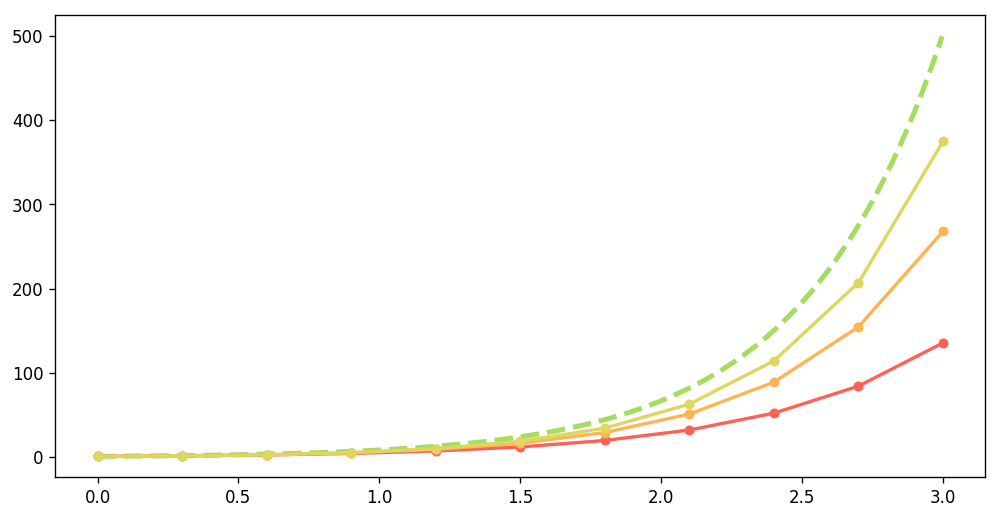

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation

plt.style.use("default")
#plt.style.use("seaborn-dark")
plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(10,5),dpi=120) #figsize=(7,7)
fig.patch.set_facecolor('white')
#plt.xticks([])
#plt.yticks([])

def L(x):
    return 5/4*math.exp(2*x)-1/2*x-1/4

xt = np.arange(0,3,0.003)
yt = []
for e in xt:
    yt.append(L(e))


ye = [1]
xe = [0]
yb = [1]
xb = [0]
yc = [1]
xc = [0]
h = 0.3
it = 10

# Euler
for i in range(it):
    ye.append(ye[i] + (2 * ye[i] + xe[i])* h)
    xe.append(xe[i]+h)     

# 1 Schritt
for i in range(it):
    if i == 0:
        yb.append(yb[i] + (2 * yb[i] + xb[i])* h)
        xb.append(xb[i]+h)
    else:
        yb.append(yb[i] + 1/2 * h *(3 * (2 * yb[i] + xb[i]) - (2 * yb[i-1] + xb[i-1])))
        xb.append(xb[i]+h)

# 3 Schritt
for i in range(it):
    if i == 0:
        yc.append(yc[i] + (2 * yc[i] + xc[i])* h)
        xc.append(xc[i]+h)
    elif i == 1:
        yc.append(yc[i] + 1/2 * h *(3 * (2 * yc[i] + xc[i]) - (2 * yc[i-1] + xc[i-1])))
        xc.append(xc[i]+h)
    elif i == 2:
        yc.append(yc[i] + 1/12 * h *(23 * (2 * yc[i] + xc[i]) - 16*(2 * yc[i-1] + xc[i-1]) +5*(2 * yc[i-2] + xc[i-2])))
        xc.append(xc[i]+h) 
    else:
        yc.append(yc[i] + 1/24 * h *(55 * (2 * yc[i] + xc[i]) - 59*(2 * yc[i-1] + xc[i-1]) +37*(2 * yc[i-2] + xc[i-2]) - 9*(2 * yc[i-3] + xc[i-3])))
        xc.append(xc[i]+h)        
    
Truth = plt.plot(xt,yt,"--", color="#a4dd5f", lw=3, label="anzunähernde Funktion")
plt.plot(xe, ye, "-o", color="#ff6254", lw=2, markersize=5, label="k = 0")
plt.plot(xb, yb, "-o", color="#ffb454", lw=2, markersize=5, label="k = 1")
plt.plot(xc, yc, "-o", color="#ddd75f", lw=2, markersize=5, label="k = 3")
#plt.legend()
plt.show()